# Data analysis
Let's take a look at the relationships within our data.

In [1]:
# import necessary libraries and read our data
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
df = pd.read_csv('data/raw.csv')

In [2]:
c_mat = df.corr()
c_mat

,prices,market_caps,total_volumes
prices,1.000000,0.999358,0.182120
market_caps,0.999358,1.000000,0.182603
total_volumes,0.182120,0.182603,1.000000


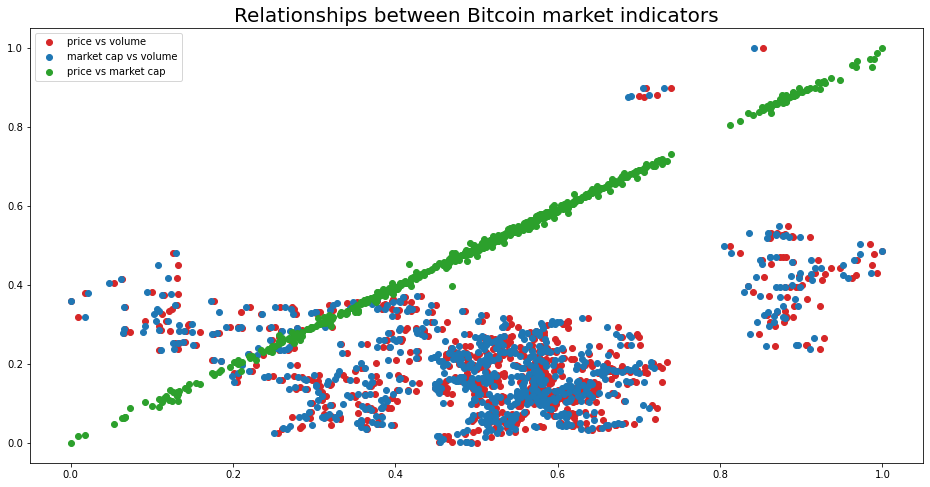

In [3]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(df['prices'], df['total_volumes'], color='tab:red', label='price vs volume')
ax.scatter(df['market_caps'], df['total_volumes'], color='tab:blue', label='market cap vs volume')
ax.scatter(df['prices'], df['market_caps'], color='tab:green', label='price vs market cap')
ax.legend()
ax.set_title('Relationships between Bitcoin market indicators', fontsize=20)
plt.show()

Both our plot and our correlation matrix show that price and market cap are higly correlated, while total volume is weakly correlated with the other two variables. This suggests that it may be useful to perform dimension reduction on the data. First, we'll perform PCA to see if that gives us any useful information.

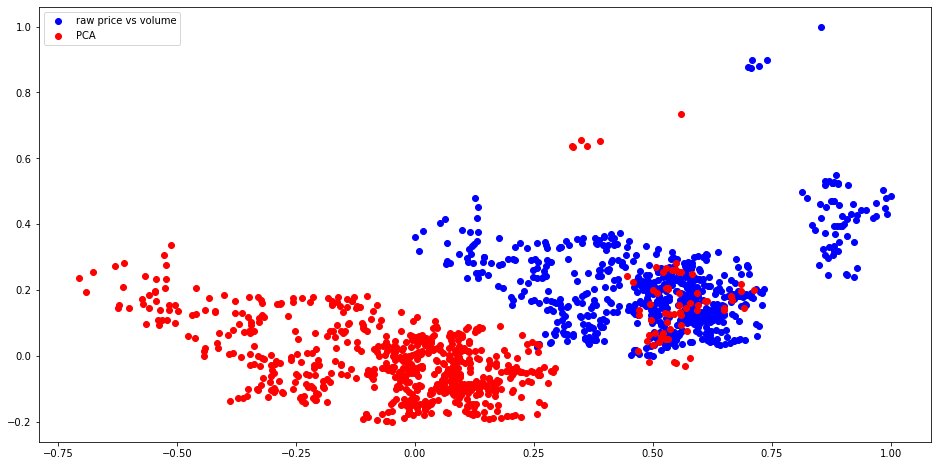

In [4]:
# perform PCA aiming for 2 components, since we have 2 strongly and one weakly correlated feature
X = df.values

pca = PCA(n_components=2)
principal_comps = pca.fit_transform(X)

df_reduced = pd.DataFrame(principal_comps, columns=['pc1', 'pc2'])

# plot
fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(df['prices'], df['total_volumes'], color='blue', label='raw price vs volume')
ax.scatter(df_reduced['pc1'], df_reduced['pc2'], color='red', label='PCA')
ax.legend()
plt.show()

Visually, the PCA data seems to have a very similar structure to the raw price vs volume data. This suggests that performing PCA doesn't add very much to our understanding of the data, and might not be that useful to our model. PCA also tends to obfuscate the model's actual function, since instead of price, volume, and market cap labels, we just have various principal components. For this reason, we'll simply drop the market cap column from our dataset.

## Balance of dataset
Another important metric is how balanced our data is. If there are significantly more of one type of label, we'll need to use a different metric for our models' performances. We're labeling by whether price increases or decreases; an easy expedient for this is to use Numpy to find the differences between subsequent points, and then use the signs of each entry in the resulting difference array as labels (labeling the last point 'hold' for now).

In [12]:
prices = np.array(df['prices'])
diffs = np.diff(prices)
labels = np.append(np.sign(diffs), 0)
pos_labels = np.sum(labels == 1)
neg_labels = np.sum(labels == -1)
z_labels = 1
n = len(labels)
print(f'Data proportions: Buy: {pos_labels / n}; Sell: {neg_labels / n}; Hold: {z_labels / n}')

Data proportions: Buy: 0.4909847434119279; Sell: 0.507628294036061; Hold: 0.0013869625520110957


The label split is almost 50-50; 49% of the data are in the 'buy' class, and 51% are in the 'sell' class. The added 'hold' label at the end is negligible for now. This means accuracy using simple MCE is a decent metric for our models' performances.  
Notably, this gives us some leeway. If we wanted to train more conservative models that traded more cautiously, we could use precision as a metric, which would tend to favor models that made fewer false-positive errors.